In [ ]:
# Objectif G√©n√©ral
#  ‚Äî L‚Äôobjectif de ce TP est de vous guider √† travers toutes les √©tapes de la construction
#  d‚Äôun mod√®le de Machine Learning, de la collecte des donn√©es √† l‚Äô√©valuation finale.
#  ‚Äî Nousutiliserons le jeu de donn√©es California Housing, qui contient des informations
#  agr√©g√©es sur des blocs de recensement en Californie et dont la variable cible est le prix
#  m√©dian des maisons (en centaines de milliers de dollars). Il s‚Äôagit d‚Äôun probl√®me de
#  r√©gression.

In [1]:
# Chargement et description initiale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# 1 Phase I : Processing, Wrangling & Visualizing Data
#  1.1 Data Collection et Description
#  ‚Äî T√¢che 1.1 : Chargez le jeu de donn√©es California Housing en utilisant scikit-learn.
#  Cr√©ez un DataFrame Pandas pour faciliter la manipulation et incluez la variable cible
#  (MedHouseVal).

In [3]:
 # Charger les donn√©es

housing = fetch_california_housing(as_frame = True)
df = housing.frame
df.rename(columns={'MedHouseVal' : 'Target'}, inplace=True)

In [4]:
print("Description du DataFrame")
print(df.info())

Description du DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [5]:
print("\n Premieres lignes:")
print(df.head())


 Premieres lignes:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [6]:
# T√¢che 1.2 : Affichez les statistiques descriptives de base (describe()). Identifiez les
# valeurs manquantes (s‚Äôil y en a) et proposez un plan pour les g√©rer.

print("\n Statistiques descriptives de base")
print(df.describe())


 Statistiques descriptives de base
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.15395

In [7]:
# T√¢che 1.3 : S√©parez les caract√©ristiques (X) de la variable cible (y).

X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df.Target

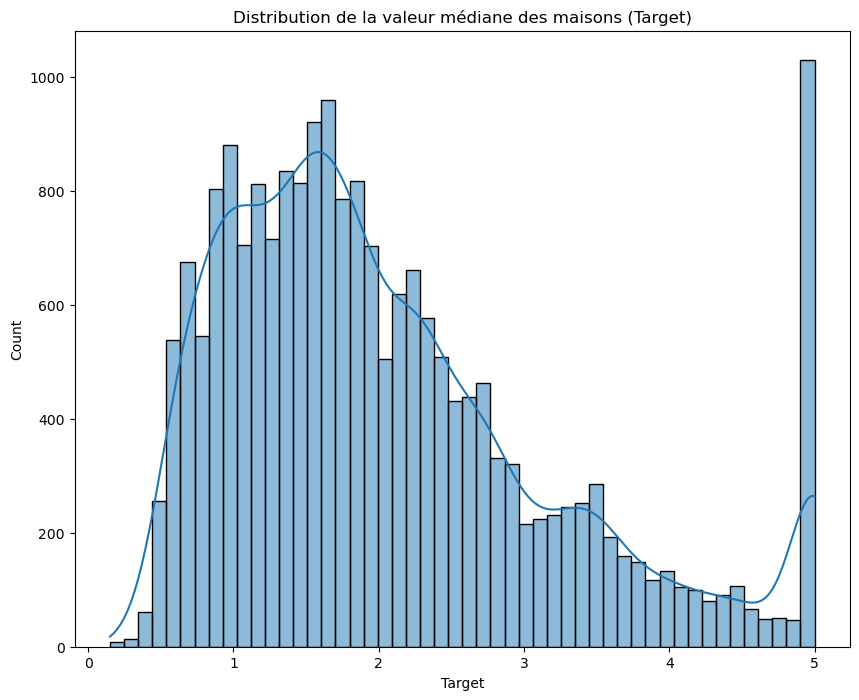

In [8]:
# T√¢che 1.4 & 1.5: Visualisation

# T√¢che 1.4 : Visualisez la distribution de la variable cible (Target) √† l‚Äôaide d‚Äôun
# histogramme. Commentez sa forme (sym√©trique, biais√©e, etc.).

plt.figure(figsize=(10, 8))
sns.histplot(df['Target'], bins=50, kde=True)
plt.title('Distribution de la valeur m√©diane des maisons (Target)')
plt.show()

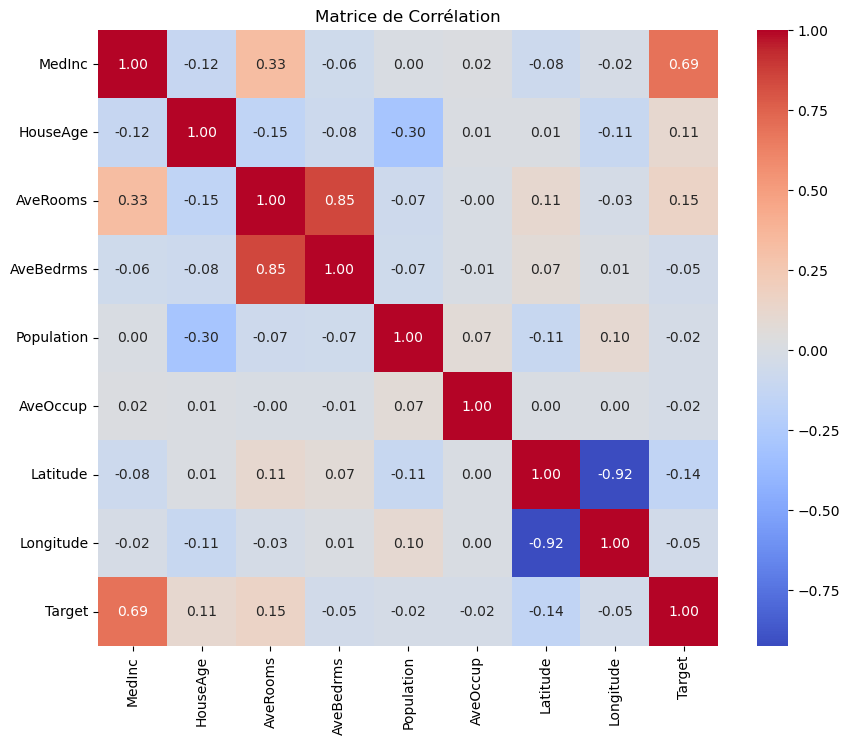

In [9]:
# T√¢che 1.5 : Affichez la matrice de corr√©lation pour visualiser les relations lin√©aires
# entre les caract√©ristiques et avec la cible. Quel est l‚Äôimpact de MedInc (Revenu M√©dian)
# sur Target?

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corr√©lation')
plt.show()

In [10]:
# 2 Phase II : Feature Engineering and Selection
#  2.1 Feature Extraction and Engineering
#  ‚Äî T√¢che 2.1 : Le jeu de donn√©es fournit des totaux (pi√®ces, chambres, population) par
#  bloc. Cr√©ez les trois nouvelles caract√©ristiques d√©riv√©es suivantes (ratios par foyer) pour
#  capturer des informations plus pertinentes :
#  1. RoomsPerHousehold
#  2. BedroomsPerRoom
#  3. PopulationPerHousehold

In [11]:
# 2.1: Feature Engineering

X = df.drop('Target', axis=1)
y = df['Target']
X['RoomsPerHousehold'] = X['AveRooms'] / X['AveOccup']
X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']
X['PopulationPerHousehold'] = X['Population'] / X['AveOccup']

In [33]:
print("\n X: \n", X)


 X: 
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  RoomsPerHouseh

In [34]:
#S√©paration des donn√©es
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# T√¢che 2.2 : √âtant donn√© que les caract√©ristiques ont des √©chelles tr√®s diff√©rentes, appliquez
#  une normalisation (StandardScaler) aux ensembles d‚Äôentra√Ænement et de test.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("\n√âchelle des donn√©es apr√®s standardisation (premi√®res lignes):")
print(X_train_scaled.head())


√âchelle des donn√©es apr√®s standardisation (premi√®res lignes):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
3 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
4 -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832  0.532084   

   Longitude  RoomsPerHousehold  BedroomsPerRoom  PopulationPerHousehold  
0   1.272587          -0.552017        -0.211785                0.322906  
1   0.709162           0.526956         0.342185                0.672027  
2  -0.447603           0.082291        -0.661658               -0.430461  
3   1.232698          -0.869143         0.783032               -0.380587  
4  -0.108551           0.661600        -0.550364               -0.314962  


In [ ]:
# fit_transform() calcule la moyenne et l‚Äô√©cart-type sur l‚Äôensemble d‚Äôentra√Ænement, puis applique la normalisation.
# transform() applique les m√™mes param√®tres sur le test.

# Il est crucial d'appliquer fit_transform() uniquement sur l'ensemble d'entrainement pour eviter que le modele n'ai access au donnees de test avant la prediction.

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)

# Importance de caracteristiques
importances = forest.feature_importances_
indices = np.argsort(importances)[:: -1]

# Affichage des 5 plus importantes
top5_features = X_train.columns[indices[:5]]
print("Top 5 des caracteristiques des plus importantes: ")
for feature, importance in zip(top5_features, importances[indices[:5]]):
    print(f"{feature}: {importance: .4f}")

Top 5 des caracteristiques des plus importantes: 
MedInc:  0.5211
AveOccup:  0.1268
Latitude:  0.0828
Longitude:  0.0828
HouseAge:  0.0518


In [ ]:
 # 3 Phase III : Building, Tuning Deploying Models
 # 3.1 Model Building
 # ‚Äî T√¢che 3.1 : Entra√Ænez un mod√®le de R√©gression Lin√©aire (LinearRegression) et
 # un mod√®le de For√™t Al√©atoire (RandomForestRegressor) en utilisant les donn√©es
 # normalis√©es.
 # ‚Äî T√¢che3.2:Expliquezbri√®vement les avantages th√©oriques de l‚Äôutilisation d‚Äôun mod√®le
 # non-lin√©aire (Random Forest) par rapport √† un mod√®le lin√©aire (R√©gression Lin√©aire)
 # dans ce contexte.

In [16]:
# 3.1: Entra√Ænement des mod√®les
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [17]:
# R√©gression Lin√©aire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# For√™t Al√©atoire (hyperparam√®tres de base)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
 print("\nMod√®les entra√Æn√©s.")


Mod√®les entra√Æn√©s.


In [ ]:
# 3.2: Explication

# Contrairement √† la r√©gression lin√©aire, qui suppose une relation lin√©aire entre les variables et la cible, le mod√®le de Random Forest est capable de capturer des relations complexes et non lin√©aires.
# Dans le contexte du jeu de donn√©es California Housing, cela permet de mieux mod√©liser la relation entre le prix des maisons et les variables socio-√©conomiques (revenu m√©dian, densit√©, etc.), qui ne sont pas forc√©ment lin√©aires.
# Ainsi, la Random Forest obtient g√©n√©ralement de meilleures performances pr√©dictives que la r√©gression lin√©aire.

In [ ]:
 # 3.2 Model Evaluation
 # ‚Äî T√¢che3.3:√âvaluezlesdeuxmod√®lessurl‚Äôensemble de test (X_test_scaled, y_test)
 # en utilisant les m√©triques suivantes (plus les faibles valeurs sont bonnes) :
# 1. Mean Squared Error (MSE)
#  2. Root Mean Squared Error (RMSE)

In [20]:
# √âvaluation des mod√®les
from sklearn.metrics import mean_squared_error

In [21]:
# Pr√©dictions
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_forest = forest_reg.predict(X_test_scaled)

In [22]:
# √âvaluation R√©gression Lin√©aire
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

In [23]:
# √âvaluation For√™t Al√©atoire
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)

In [24]:
print(f"\n[R√©gression Lin√©aire] RMSE: {rmse_lin:.4f}")
print(f"[For√™t Al√©atoire] RMSE: {rmse_forest:.4f}")


[R√©gression Lin√©aire] RMSE: 0.6738
[For√™t Al√©atoire] RMSE: 0.5060


In [25]:
print(f"\n[R√©gression Lin√©aire] MSE: {mse_lin:.4f}")
print(f"[For√™t Al√©atoire] MSE: {mse_forest:.4f}")


[R√©gression Lin√©aire] MSE: 0.4540
[For√™t Al√©atoire] MSE: 0.2561


In [ ]:
# 3.4 Model Deployment (Simul√©)
#  ‚Äî T√¢che 3.5 : En supposant que le mod√®le Random Forest soit le meilleur, utilisez la
#  biblioth√®que joblib pour sauvegarder le mod√®le entra√Æn√© sur le disque. C‚Äôest l‚Äô√©tape
#  de d√©ploiement de base qui permet de r√©utiliser le mod√®le sans le r√©-entra√Æner.

In [26]:
# 3.5: Sauvegarde/D√©ploiement du mod√®le
import joblib

In [27]:
# Sauvegarder le meilleur mod√®le (ici, le Random Forest)
joblib.dump(forest_reg, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

In [28]:
print("\nMod√®le ‚Äôrandom_forest_regressor.pkl‚Äô sauvegard√©.")


Mod√®le ‚Äôrandom_forest_regressor.pkl‚Äô sauvegard√©.


In [29]:
# Test de chargement
loaded_model = joblib.load('random_forest_regressor.pkl')
print(f"Mod√®le charg√©. Test de pr√©diction sur le premier √©l√©ment du test: {loaded_model.predict(X_test_scaled.iloc[[0]])[0]:.4f}")

Mod√®le charg√©. Test de pr√©diction sur le premier √©l√©ment du test: 0.4775


In [42]:
# T√¢che 4.1 ‚Äî Synth√®se du pipeline ML
# üîπ Exemple de paragraphe :

# Dans ce TP, nous avons construit un pipeline complet de Machine Learning appliqu√© au jeu de donn√©es California Housing. 
# Apr√®s avoir charg√© et explor√© les donn√©es, nous avons cr√©√© de nouvelles caract√©ristiques d√©riv√©es, 
# puis appliqu√© une normalisation pour mettre toutes les variables sur une m√™me √©chelle.
# Nous avons ensuite entra√Æn√© deux mod√®les : une r√©gression lin√©aire et une for√™t al√©atoire. 
# L‚Äô√©valuation √† l‚Äôaide du RMSE a montr√© que le mod√®le de for√™t al√©atoire obtenait de meilleures performances, 
# confirmant l‚Äôint√©r√™t des mod√®les non lin√©aires pour capturer la complexit√© des relations entre variables.

In [ ]:
# T√¢che 4.2 ‚Äî Strat√©gies d‚Äôam√©lioration
# üîπ Id√©es concr√®tes :

# Optimisation des hyperparam√®tres
# Utiliser GridSearchCV ou RandomizedSearchCV pour tester diff√©rentes valeurs de :

# n_estimators

# max_depth

# min_samples_split, etc.

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Meilleurs param√®tres :", grid_search.best_params_)


Meilleurs param√®tres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [46]:
joblib.dump(grid_search, 'random_forest_grid_search.pkl')

['random_forest_grid_search.pkl']

In [ ]:
# Autres mod√®les avanc√©s

# Gradient Boosting (GradientBoostingRegressor)

# XGBoost ou LightGBM

# Gestion des outliers
# D√©tection par IQR ou Z-score, puis suppression ou traitement.

# S√©lection automatique de variables
# Utiliser SelectFromModel ou RFE pour ne garder que les variables les plus influentes.